In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/Adult/adult_classification.csv', index_col="index")

In [4]:
data

Age  Workclass_0  Workclass_1  Workclass_2  Workclass_3  Fnlwgt  \
index                                                                    
0       39            0            0            0            1   77516   
1       50            0            0            1            0   83311   
2       38            0            0            1            1  215646   
3       53            0            0            1            1  234721   
4       28            0            0            1            1  338409   
...    ...          ...          ...          ...          ...     ...   
48837   39            0            0            1            1  215419   
48838   64            0            1            1            0  321403   
48839   38            0            0            1            1  374983   
48840   44            0            0            1            1   83891   
48841   35            0            1            1            1  182148   

       Education_0  Education_1  Education_2  Education_3  ...  Capital-gain  \
index                                                      ...                 
0                0            0            0            0  ...          2174   
1                0            0            0            0  ...             0   
2                0            0            0            1  ...             0   
3                0            0            0            1  ...             0   
4                0            0            0            0  ...             0   
...            ...          ...          ...          ...  ...           ...   
48837            0            0            0            0  ...             0   
48838            0            0            0            1  ...             0   
48839            0            0            0            0  ...             0   
48840            0            0            0            0  ...          5455   
48841            0            0            0            0  ...             0   

       Capital-loss  Hours-per-week  Native-country_0  Native-country_1  \
index                                                                     
0                 0              40                 0                 0   
1                 0              13                 0                 0   
2                 0              40                 0                 0   
3                 0              40                 0                 0   
4                 0              40                 0                 0   
...             ...             ...               ...               ...   
48837             0              36                 0                 0   
48838             0              40                 0                 0   
48839             0              50                 0                 0   
48840             0              40                 0                 0   
48841             0              60                 0                 0   

       Native-country_2  Native-country_3  Native-country_4  Native-country_5  \
index                                                                           
0                     0                 0                 0                 1   
1                     0                 0                 0                 1   
2                     0                 0                 0                 1   
3                     0                 0                 0                 1   
4                     0                 0                 1                 0   
...                 ...               ...               ...               ...   
48837                 0                 0                 0                 1   
48838                 0                 0                 0                 1   
48839                 0                 0                 0                 1   
48840                 0                 0                 0                 1   
48841                 0                 0              

In [5]:
data.columns.values

array(['Age', 'Workclass_0', 'Workclass_1', 'Workclass_2', 'Workclass_3',
       'Fnlwgt', 'Education_0', 'Education_1', 'Education_2',
       'Education_3', 'Education_4', 'Education-num', 'Marital-status_0',
       'Marital-status_1', 'Marital-status_2', 'Occupation_0',
       'Occupation_1', 'Occupation_2', 'Occupation_3', 'Relationship_0',
       'Relationship_1', 'Relationship_2', 'Race_0', 'Race_1', 'Race_2',
       'Sex_0', 'Sex_1', 'Capital-gain', 'Capital-loss', 'Hours-per-week',
       'Native-country_0', 'Native-country_1', 'Native-country_2',
       'Native-country_3', 'Native-country_4', 'Native-country_5', 'Wage'],
      dtype=object)

In [6]:
from sklearn.preprocessing import MinMaxScaler as SScaler

In [7]:
scaler = SScaler()

In [8]:
X = data.iloc[0:2000,0:36]
X = scaler.fit_transform(X)
Y = data.iloc[0:2000,36]

In [9]:
from imblearn.under_sampling import ClusterCentroids
from collections import Counter

In [10]:
print(sorted(Counter(Y).items()))

[(0, 1492), (1, 508)]


In [11]:
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, Y)

In [12]:
print(sorted(Counter(y_resampled).items()))

[(0, 508), (1, 508)]


In [13]:
X = X_resampled
Y = y_resampled

In [14]:
print(X)

[[3.66935484e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.36559140e-01 0.00000000e+00 0.00000000e+00 ... 6.93889390e-18
  0.00000000e+00 1.00000000e+00]
 [5.16129032e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [4.03225806e-01 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.67741935e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.22580645e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

# Обычное обучение

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def scopes_on_models(X_train_n, X_test_n, y_train_n, y_test_n):
  SVC = svm.SVC()
  SVC.fit(X_train_n, y_train_n)
  y_pred = SVC.predict(X_test_n)
  print("=======SVC=======")
  print(confusion_matrix(y_test_n, y_pred))
  print(classification_report(y_test_n, y_pred))
  NB = GaussianNB()
  NB.fit(X_train_n, y_train_n)
  y_pred = NB.predict(X_test_n)
  print("=======NB=======")
  print(confusion_matrix(y_test_n, y_pred))
  print(classification_report(y_test_n, y_pred))

In [ ]:
scopes_on_models(X_train, X_test, y_train, y_test)

=======SVC=======
[[316  66]
 [ 55 316]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       382
           1       0.83      0.85      0.84       371

    accuracy                           0.84       753
   macro avg       0.84      0.84      0.84       753
weighted avg       0.84      0.84      0.84       753

=======NB=======
[[310  72]
 [ 48 323]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       382
           1       0.82      0.87      0.84       371

    accuracy                           0.84       753
   macro avg       0.84      0.84      0.84       753
weighted avg       0.84      0.84      0.84       753



# Методы отбора признаков

## Одномерный отбор признаков

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
n = 10

test = SelectKBest(score_func=chi2, k=n)
fit = test.fit(X, Y)

np.set_printoptions(precision=10)

myCols = dict(zip(data.columns.values,fit.scores_))
sortMyCols = dict(sorted(myCols.items(), key = lambda item: item[1], reverse=False))
for a,b in sortMyCols.items():
  if(n>0):
    print(a,": ",b)
    n = n - 1
features = fit.transform(X)

print(features[0:5,:])

Fnlwgt :  0.007283595127863455
Workclass_3 :  0.08147710011393541
Occupation_1 :  0.18689627842240492
Native-country_5 :  0.6482469886221307
Native-country_3 :  2.0779693333139835
Workclass_0 :  4.620399257269364
Native-country_2 :  5.631621564755113
Native-country_4 :  8.789606026602733
Native-country_1 :  9.433461666137095
Education_2 :  11.774658828196191
[[0.7272727273 0.           1.           1.           0.
  0.           1.           0.           1.           0.0217402174]
 [0.7272727273 1.           0.           0.           0.
  1.           0.           0.           1.           0.          ]
 [0.3636363636 1.           1.           1.           0.
  0.           1.           0.           1.           0.          ]
 [0.1818181818 1.           0.           1.           0.
  1.           0.           0.           1.           0.          ]
 [0.7272727273 1.           0.           0.           0.
  1.           1.           1.           0.           0.          ]]


In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features, Y, test_size=0.30)

In [ ]:
scopes_on_models(X_train_1, X_test_1, y_train_1, y_test_1)

=======SVC=======
[[10147   562]
 [ 1833  1528]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.89     10709
           1       0.73      0.45      0.56      3361

    accuracy                           0.83     14070
   macro avg       0.79      0.70      0.73     14070
weighted avg       0.82      0.83      0.81     14070

=======NB=======
[[7636 3073]
 [ 649 2712]]
              precision    recall  f1-score   support

           0       0.92      0.71      0.80     10709
           1       0.47      0.81      0.59      3361

    accuracy                           0.74     14070
   macro avg       0.70      0.76      0.70     14070
weighted avg       0.81      0.74      0.75     14070



## Рекурсивный отбор признаков

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [ ]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, Y)

In [ ]:
print("Num Features:", fit.n_features_) 

myCols = zip(data.columns.values, fit.ranking_, fit.support_)
sortMyCols = (sorted(myCols, key = lambda item: item[1], reverse=False))
for a,b,c in sortMyCols:
    print(a,": ",b,", ", c)

Num Features: 10
Age :  1 ,  True
Workclass_0 :  1 ,  True
Fnlwgt :  1 ,  True
Education-num :  1 ,  True
Marital-status_2 :  1 ,  True
Relationship_1 :  1 ,  True
Relationship_2 :  1 ,  True
Capital-gain :  1 ,  True
Capital-loss :  1 ,  True
Hours-per-week :  1 ,  True
Sex_0 :  2 ,  False
Marital-status_1 :  3 ,  False
Native-country_0 :  4 ,  False
Occupation_0 :  5 ,  False
Occupation_3 :  6 ,  False
Native-country_3 :  7 ,  False
Relationship_0 :  8 ,  False
Workclass_3 :  9 ,  False
Native-country_1 :  10 ,  False
Native-country_2 :  11 ,  False
Race_2 :  12 ,  False
Workclass_1 :  13 ,  False
Occupation_2 :  14 ,  False
Race_1 :  15 ,  False
Occupation_1 :  16 ,  False
Workclass_2 :  17 ,  False
Sex_1 :  18 ,  False
Marital-status_0 :  19 ,  False
Native-country_4 :  20 ,  False
Education_0 :  21 ,  False
Education_4 :  22 ,  False
Race_0 :  23 ,  False
Education_1 :  24 ,  False
Native-country_5 :  25 ,  False
Education_2 :  26 ,  False
Education_3 :  27 ,  False


In [ ]:
features = data[["Age", "Workclass_0", "Fnlwgt", "Education-num", "Marital-status_2", "Relationship_1", "Relationship_2", "Capital-gain", "Capital-loss", "Hours-per-week"]].values

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features, Y, test_size=0.30)

In [ ]:
scopes_on_models(X_train_2, X_test_2, y_train_2, y_test_2)

=======SVC=======
[[10567    18]
 [ 2953   532]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     10585
           1       0.97      0.15      0.26      3485

    accuracy                           0.79     14070
   macro avg       0.87      0.58      0.57     14070
weighted avg       0.83      0.79      0.72     14070

=======NB=======
[[10027   558]
 [ 2422  1063]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87     10585
           1       0.66      0.31      0.42      3485

    accuracy                           0.79     14070
   macro avg       0.73      0.63      0.64     14070
weighted avg       0.77      0.79      0.76     14070



## Отбор на основе важности

In [ ]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier 

In [ ]:
model = ExtraTreesClassifier()
model.fit(X, Y)
myCols = zip(data.columns.values, model.feature_importances_)
sortMyCols = (sorted(myCols, key = lambda item: item[1], reverse=False))
for a,b in sortMyCols:
    print(a,": ",b)

Workclass_0 :  0.00013473073105532834
Education_0 :  0.0010818250713734393
Native-country_0 :  0.0015129974199546035
Race_0 :  0.0024501591143691035
Native-country_1 :  0.0028078815728295775
Native-country_5 :  0.003968943745080955
Native-country_2 :  0.004036366752888392
Native-country_4 :  0.004341551204445263
Marital-status_0 :  0.004580027326108574
Race_2 :  0.005612884543860263
Native-country_3 :  0.006323358369181885
Race_1 :  0.0074607583272795494
Sex_1 :  0.007669848844945413
Sex_0 :  0.009282731571866178
Education_4 :  0.009776559873814766
Education_2 :  0.010694281327577609
Workclass_2 :  0.010779290468006734
Relationship_2 :  0.010958411028186092
Education_1 :  0.011620936655268208
Workclass_1 :  0.011768971058711542
Workclass_3 :  0.013340155567960572
Occupation_2 :  0.014583840597482007
Occupation_1 :  0.014763842558031997
Education_3 :  0.017531664352304605
Occupation_0 :  0.018940959184938357
Capital-loss :  0.024386916917057917
Relationship_0 :  0.026569569379681322
Occ

In [ ]:
features = data[["Fnlwgt", "Age", "Hours-per-week", "Marital-status_2", "Capital-gain", "Education-num", "Relationship_1", "Marital-status_1", "Relationship_0", "Occupation_3"]].values

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(features, Y, test_size=0.30)

In [ ]:
scopes_on_models(X_train_3, X_test_3, y_train_3, y_test_3)

=======SVC=======
[[10537    18]
 [ 2939   576]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     10555
           1       0.97      0.16      0.28      3515

    accuracy                           0.79     14070
   macro avg       0.88      0.58      0.58     14070
weighted avg       0.83      0.79      0.73     14070

=======NB=======
[[10300   255]
 [ 2747   768]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87     10555
           1       0.75      0.22      0.34      3515

    accuracy                           0.79     14070
   macro avg       0.77      0.60      0.61     14070
weighted avg       0.78      0.79      0.74     14070



## Метод главных компонент

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
fit = pca.fit(X)
features = fit.transform(X)

print("Explained Variance:", fit.explained_variance_ratio_)
print(features[0:10,:])

Explained Variance: [0.2177312283 0.0910517605 0.079890963  0.0728503544 0.0656020235
 0.0578607621 0.0522066596 0.0496747767 0.0423486993 0.0372483655]
[[ 0.5562349941  0.5722812356 -0.7664820198  0.1431999002 -0.0574337831
   0.9939383883 -0.7890571079  0.8406396838 -0.1004168896  0.4332397773]
 [-1.2637932516  0.7678253643 -0.523653948  -0.3088937373  0.4235564182
   0.1839457726  0.2512799266 -0.1017342954 -0.0917975104  0.2439601025]
 [ 0.1724263369 -0.6597515568 -0.3438086915 -0.7749118655  0.0686875722
   0.2595511817 -0.9629688734  0.0908044317  0.0132943172  0.3452013275]
 [-0.9946332669 -0.3135709877 -0.209314323  -0.5559690512 -0.1654484677
   0.8567947684  0.2480398965 -0.0300258097  1.2096393553 -0.0105405336]
 [ 0.0419260912  1.5648341321  0.5414506018 -0.4123614599 -0.4544545577
   0.3182909024  0.3836695163 -0.2752005919  1.1607550104 -0.9777840757]
 [-0.1470416941  0.6507166697  0.6044099757 -1.3017823768  0.3615641837
  -0.5580276153  0.4455691353  0.5299172783 -0.063

In [ ]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(features, Y, test_size=0.30)

In [ ]:
scopes_on_models(X_train_4, X_test_4, y_train_4, y_test_4)

=======SVC=======
[[9665  941]
 [1598 1866]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     10606
           1       0.66      0.54      0.60      3464

    accuracy                           0.82     14070
   macro avg       0.76      0.72      0.74     14070
weighted avg       0.81      0.82      0.81     14070

=======NB=======
[[8143 2463]
 [ 996 2468]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.82     10606
           1       0.50      0.71      0.59      3464

    accuracy                           0.75     14070
   macro avg       0.70      0.74      0.71     14070
weighted avg       0.79      0.75      0.77     14070



# Класстеризация

## KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, algorithm='elkan').fit(X_train)
print(kmeans.cluster_centers_)
print('Score:', kmeans.score(X_test, y_test))

[[4.1771217712e-01 5.3673264005e-04 2.0000000000e-01 8.5602146931e-01
  8.1361959074e-01 1.1805128531e-01 9.9966454210e-03 1.1754444817e-01
  3.3599463267e-01 6.3636363636e-01 3.2042938611e-01 5.1068280931e-01
  3.2203958403e-03 9.9885944314e-01 3.6229453204e-03 2.5816839987e-01
  5.4183160013e-01 5.7047970480e-01 4.0717879906e-01 1.6370345522e-02
  9.9617577994e-01 1.0815162697e-01 1.2009392821e-02 8.9298892989e-02
  9.3713518953e-01 1.1150620597e-01 8.8849379403e-01 1.7866355785e-02
  2.7694406170e-02 4.3358618187e-01 7.7155317008e-03 1.9859107682e-02
  3.7235826904e-02 6.7158671587e-02 4.5420999665e-02 9.5102314660e-01]
 [2.7687992052e-01 5.0217609642e-04 1.7693337797e-01 8.6781609195e-01
  8.5141167280e-01 1.2158895095e-01 1.8580515567e-02 9.1451846892e-02
  3.9331547818e-01 6.9467693338e-01 2.9756723580e-01 4.6437593207e-01
  1.3101216382e-01 3.0638321616e-01 9.7517018190e-01 2.3691552282e-01
  5.5205892200e-01 4.4213815422e-01 5.0976453521e-01 5.2605735967e-01
  4.3633523044e-02 

In [ ]:
from sklearn.metrics import rand_score, jaccard_score, silhouette_score, calinski_harabasz_score

In [ ]:
print('Внешние меры оценки качества:')
print('Индекс Rand:', rand_score(kmeans.labels_, y_train))
print('Индекс Жаккара:', jaccard_score(kmeans.labels_, y_train))
print('\nВнутренние меры оценки качества:')
print('Коэффициент силуэта всех выборок:', silhouette_score(X_train, kmeans.labels_))
print('Индекс Calinski–Harabasz:', calinski_harabasz_score(X_train, kmeans.labels_))

Внешние меры оценки качества:
Индекс Rand: 0.5962138063067225
Индекс Жаккара: 0.048091264562421895

Внутренние меры оценки качества:
Коэффициент силуэта всех выборок: 0.18508191897800677
Индекс Calinski–Harabasz: 7664.204093390792


## Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model2 = AgglomerativeClustering(n_clusters = 2).fit(X)

pred = model2.labels_

In [ ]:
print('Внешние меры оценки качества:')
print('Индекс Rand:', rand_score(model2.labels_, Y))
print('Индекс Жаккара:', jaccard_score(model2.labels_, Y))
print('\nВнутренние меры оценки качества:')
print('Коэффициент силуэта всех выборок:', silhouette_score(X, model2.labels_))
print('Индекс Calinski–Harabasz:', calinski_harabasz_score(X, model2.labels_))

Внешние меры оценки качества:
Индекс Rand: 0.6438721181966411
Индекс Жаккара: 0.6190163934426229

Внутренние меры оценки качества:
Коэффициент силуэта всех выборок: 0.16819897826728505
Индекс Calinski–Harabasz: 506.6719571823141


In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram

[(0, 508), (1, 508)]


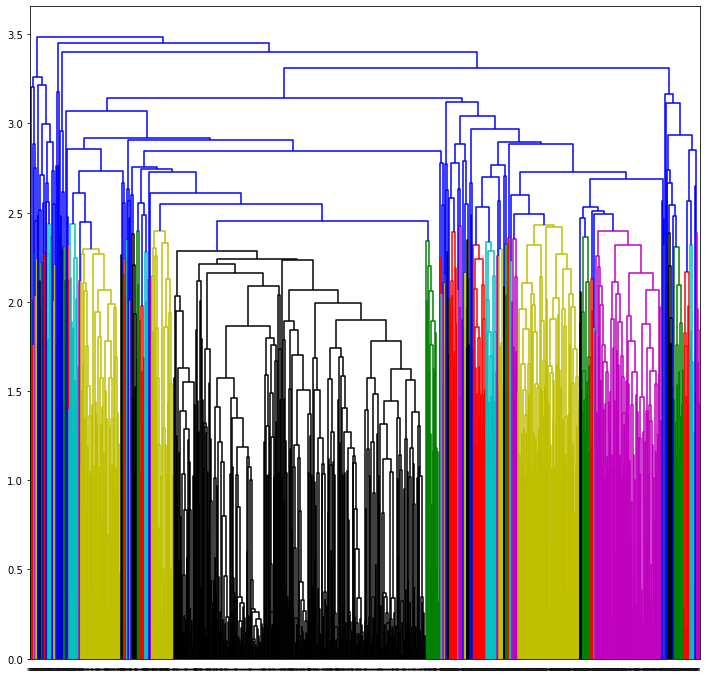

In [18]:
f = plt.figure(figsize=(12, 12))

varieties = list(Y)
print(sorted(Counter(varieties).items()))
samples = X

mergings = linkage(samples, method='average')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

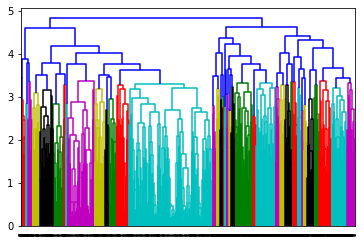

In [19]:
mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

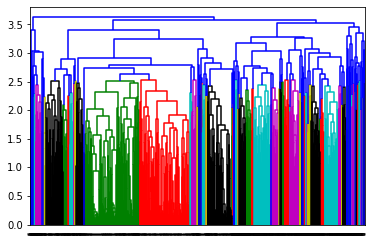

In [20]:
mergings = linkage(samples, method='weighted')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

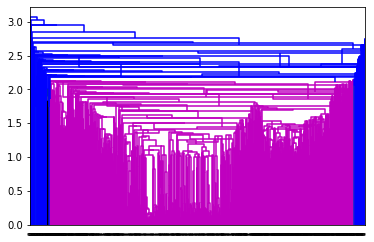

In [21]:
mergings = linkage(samples, method='centroid')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

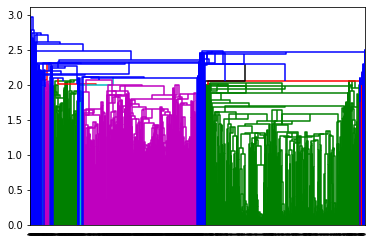

In [22]:
mergings = linkage(samples, method='median')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

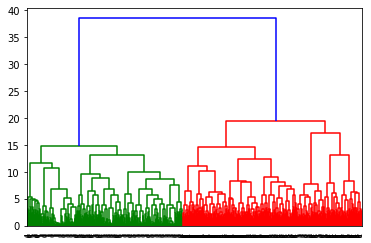

In [23]:
mergings = linkage(samples, method='ward')

dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

## t-SNE

In [ ]:
from sklearn.manifold import TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


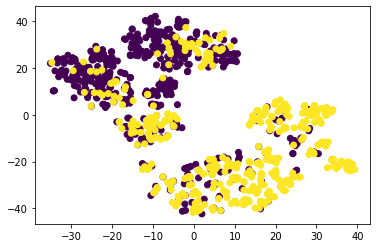

In [ ]:
model = TSNE(learning_rate=100)
transformed = model.fit_transform(X)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=Y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


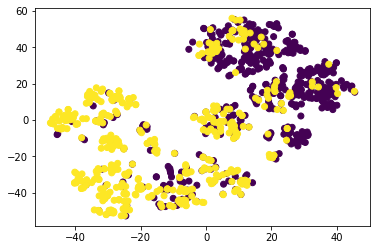

In [ ]:
model = TSNE(perplexity=20, learning_rate=500)
transformed = model.fit_transform(X)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=Y)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


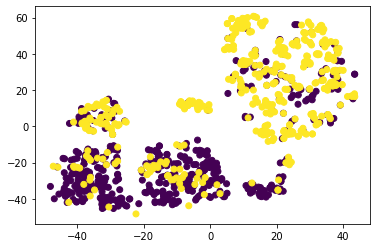

In [ ]:
model = TSNE(perplexity=20, early_exaggeration=25, learning_rate=1000)
transformed = model.fit_transform(X)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=Y)
plt.show()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

92 ,  410


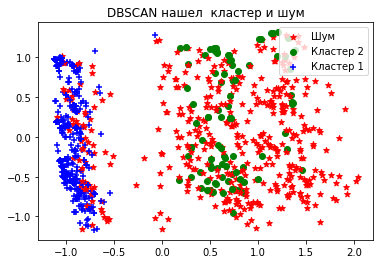

In [ ]:
dbscan = DBSCAN(eps = 1.475, min_samples = 13) 
dbscan.fit(X)
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

n = 0
k = 0
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == -1:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='*')
    elif dbscan.labels_[i] == 1:
        n = n+1
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 0:
        k = k+1
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='+')

print(n,", ",k)

plt.legend([c1, c2, c3], ['Шум', 'Кластер 2', 'Кластер 1'])
plt.title('DBSCAN нашел  2 кластера и шум')
plt.show()

In [ ]:
dbscan = DBSCAN(eps = 1.475, min_samples = 13) 
dbscan.fit(X_train)

print('Внешние меры оценки качества:')
print('Индекс Rand:', rand_score(dbscan.labels_, y_train))
print('Индекс Жаккара:', jaccard_score(dbscan.labels_, y_train, average='micro'))
print('\nВнутренние меры оценки качества:')
print('Коэффициент силуэта всех выборок:', silhouette_score(X_train, dbscan.labels_))
print('Индекс Calinski–Harabasz:', calinski_harabasz_score(X_train, dbscan.labels_))

Внешние меры оценки качества:
Индекс Rand: 0.630688773994176
Индекс Жаккара: 0.043286867204695524

Внутренние меры оценки качества:
Коэффициент силуэта всех выборок: 0.0013830239919070263
Индекс Calinski–Harabasz: 34.5099127364671
